[汽车保险赔付金额预测](https://god.yanxishe.com/codeplan/detail/299)

下载数据集

In [1]:

%%bash
wget https://data.yanxishe.com/car_insurance.zip
unzip car_insurance.zip -d car_insurance
# rm -fr *.csv
cd car_insurance
head -n 5 *.csv

Archive:  car_insurance.zip
  inflating: car_insurance/train.csv  
  inflating: car_insurance/test.csv  
==> test.csv <==
Id,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,MO,Missouri,559.25,No,Basic,College,1/12/11,Employed,F,62229,Suburban,Divorced,70,13,26,0,5,Personal Auto,Personal L2,Scratch/Dent,Agent,Two-Door Car,Medsize
1,IA,Iowa,231.73,No,Basic,Bachelor,1/16/11,Unemployed,F,0,Suburban,Single,68,10,81,0,1,Corporate Auto,Corporate L2,Collision,Call Center,Two-Door Car,Medsize
2,KS,Kansas,954.09,No,Premium,College,1/29/11,Employed,M,53351,Suburban,Married,119,4,7,0,6,Personal Auto,Personal L3,Collision,Branch,Four-Door Car,Small
3,NE,Nebraska,858.13,No,Extended,Bachelor,1/18/11,Medical Leave,M,27689,S

--2021-03-17 05:45:29--  https://data.yanxishe.com/car_insurance.zip
Resolving data.yanxishe.com (data.yanxishe.com)... 47.246.22.184
Connecting to data.yanxishe.com (data.yanxishe.com)|47.246.22.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257774 (252K) [application/zip]
Saving to: ‘car_insurance.zip’

     0K .......... .......... .......... .......... .......... 19% 1.37M 0s
    50K .......... .......... .......... .......... .......... 39% 2.77M 0s
   100K .......... .......... .......... .......... .......... 59% 73.3M 0s
   150K .......... .......... .......... .......... .......... 79% 2.86M 0s
   200K .......... .......... .......... .......... .......... 99%  127M 0s
   250K .                                                     100% 3304G=0.07s

2021-03-17 05:45:31 (3.45 MB/s) - ‘car_insurance.zip’ saved [257774/257774]



### 合并 测试集合 训练集合, 并做预处理

####导包

In [1]:

import gc

from IPython.core.display import display
from sklearn import preprocessing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### 加载数据集

In [2]:
data_root_dir:str="./car_insurance"
df_train_original: pd.DataFrame =pd.read_csv(f"{data_root_dir}/train.csv" )
df_test_original:pd.DataFrame=pd.read_csv(f"{data_root_dir}/test.csv" )


#### 原始数据集概要

##### 原始训练集概要

In [3]:
display(df_train_original.columns.values)


array(['Id', 'State Code', 'State', 'Claim Amount', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Size'], dtype=object)

In [4]:

display(df_train_original.head())

Id State Code     State  ...  Total Claim Amount  Vehicle Class Vehicle Size
0   0         KS    Kansas  ...              734.40  Four-Door Car        Large
1   1         NE  Nebraska  ...              336.00  Four-Door Car        Small
2   2         MO  Missouri  ...              398.42  Four-Door Car      Medsize
3   3         NE  Nebraska  ...              111.87  Four-Door Car      Medsize
4   4         IA      Iowa  ...              469.88   Two-Door Car        Small

[5 rows x 25 columns]

In [5]:

display(df_train_original.count())

Id                               7307
State Code                       7307
State                            7307
Claim Amount                     7307
Response                         7307
Coverage                         7307
Education                        7307
Effective To Date                7307
EmploymentStatus                 7307
Gender                           7307
Income                           7307
Location Code                    7307
Marital Status                   7307
Monthly Premium Auto             7307
Months Since Last Claim          7307
Months Since Policy Inception    7307
Number of Open Complaints        7307
Number of Policies               7307
Policy Type                      7307
Policy                           7307
Claim Reason                     7307
Sales Channel                    7307
Total Claim Amount               7307
Vehicle Class                    7307
Vehicle Size                     7307
dtype: int64

In [6]:

display(df_train_original.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             7307 non-null   int64  
 1   State Code                     7307 non-null   object 
 2   State                          7307 non-null   object 
 3   Claim Amount                   7307 non-null   float64
 4   Response                       7307 non-null   object 
 5   Coverage                       7307 non-null   object 
 6   Education                      7307 non-null   object 
 7   Effective To Date              7307 non-null   object 
 8   EmploymentStatus               7307 non-null   object 
 9   Gender                         7307 non-null   object 
 10  Income                         7307 non-null   int64  
 11  Location Code                  7307 non-null   object 
 12  Marital Status                 7307 non-null   o

None

##### 原始测试集概要

In [7]:
display(df_test_original.columns.values)


array(['Id', 'State Code', 'State', 'Claim Amount', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'], dtype=object)

In [8]:


display(df_test_original.head())

Id State Code     State  ...  Sales Channel  Vehicle Class Vehicle Size
0   0         MO  Missouri  ...          Agent   Two-Door Car      Medsize
1   1         IA      Iowa  ...    Call Center   Two-Door Car      Medsize
2   2         KS    Kansas  ...         Branch  Four-Door Car        Small
3   3         NE  Nebraska  ...            Web     Luxury SUV      Medsize
4   4         KS    Kansas  ...          Agent            SUV        Small

[5 rows x 24 columns]

In [9]:

display(df_test_original.count())

Id                               1827
State Code                       1827
State                            1827
Claim Amount                     1827
Response                         1827
Coverage                         1827
Education                        1827
Effective To Date                1827
EmploymentStatus                 1827
Gender                           1827
Income                           1827
Location Code                    1827
Marital Status                   1827
Monthly Premium Auto             1827
Months Since Last Claim          1827
Months Since Policy Inception    1827
Number of Open Complaints        1827
Number of Policies               1827
Policy Type                      1827
Policy                           1827
Claim Reason                     1827
Sales Channel                    1827
Vehicle Class                    1827
Vehicle Size                     1827
dtype: int64

In [10]:

display(df_test_original.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1827 non-null   int64  
 1   State Code                     1827 non-null   object 
 2   State                          1827 non-null   object 
 3   Claim Amount                   1827 non-null   float64
 4   Response                       1827 non-null   object 
 5   Coverage                       1827 non-null   object 
 6   Education                      1827 non-null   object 
 7   Effective To Date              1827 non-null   object 
 8   EmploymentStatus               1827 non-null   object 
 9   Gender                         1827 non-null   object 
 10  Income                         1827 non-null   int64  
 11  Location Code                  1827 non-null   object 
 12  Marital Status                 1827 non-null   o

None

##### 找到预测变量y
: "Total Claim Amount" : y : label


In [11]:
col_y= ( set(df_train_original.columns.values.tolist())-set(df_test_original.columns.values.tolist()) ) .pop()
display(col_y)

'Total Claim Amount'


#####  原始训练集相关矩阵


In [12]:

corr_train_original = df_train_original .corr()
display(corr_train_original)

Id  ...  Total Claim Amount
Id                             1.000000  ...           -0.004135
Claim Amount                  -0.003597  ...            0.239323
Income                        -0.007225  ...           -0.356174
Monthly Premium Auto          -0.000277  ...            0.634424
Months Since Last Claim       -0.011575  ...            0.003010
Months Since Policy Inception -0.005965  ...           -0.002719
Number of Open Complaints      0.009042  ...           -0.025490
Number of Policies            -0.003972  ...            0.001086
Total Claim Amount            -0.004135  ...            1.000000

[9 rows x 9 columns]

31

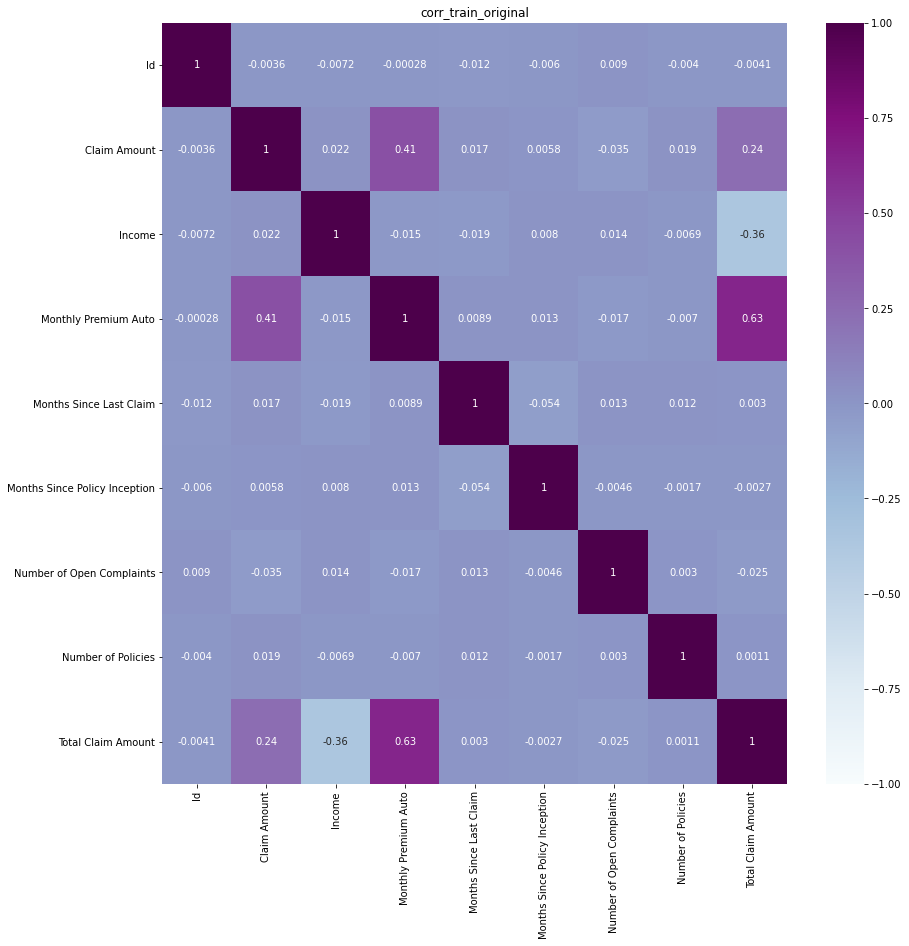

In [13]:

plt.figure(figsize = (14,14)); plt.title("corr_train_original")
sns.heatmap(corr_train_original, annot=True, vmin=-1, vmax=1, cmap="BuPu")
del corr_train_original; gc.collect()



##### 原始测试集相关矩阵


In [14]:

corr_test_original = df_test_original .corr()
display(corr_test_original)

Id  ...  Number of Policies
Id                             1.000000  ...            0.027371
Claim Amount                  -0.021382  ...            0.034139
Income                        -0.011271  ...           -0.015679
Monthly Premium Auto           0.014186  ...           -0.029413
Months Since Last Claim       -0.004489  ...           -0.002279
Months Since Policy Inception -0.000201  ...           -0.060038
Number of Open Complaints      0.002107  ...           -0.004475
Number of Policies             0.027371  ...            1.000000

[8 rows x 8 columns]

8470

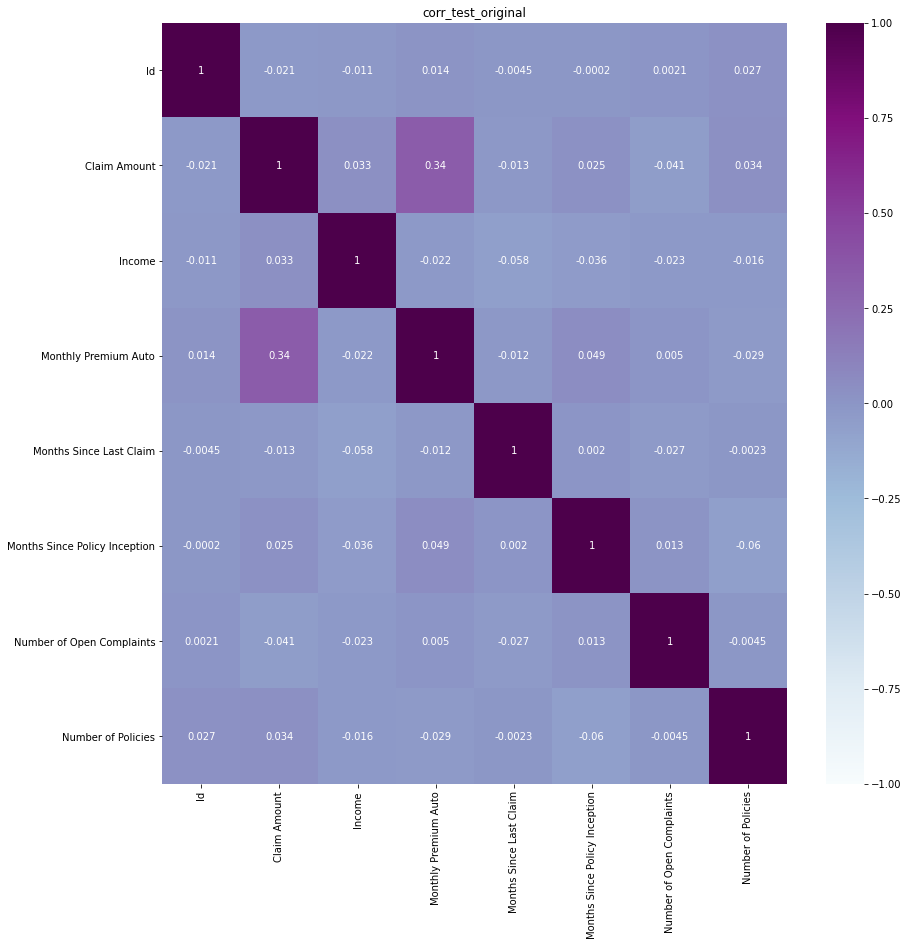

In [15]:

plt.figure(figsize = (14,14)); plt.title("corr_test_original")
sns.heatmap(corr_test_original, annot=True, vmin=-1, vmax=1, cmap="BuPu")
del corr_test_original; gc.collect()



#### 特征处理
训练集、测试集 按行放在一起，做特征处理



##### 函数: 替换一个列为独热编码


In [16]:

def replace_with_one_hot_encode(df:pd.DataFrame,column:str):
  df_with_this_column_one_hot_encode: pd.DataFrame = pd.get_dummies(df[column], prefix=f"{column}_") ; gc.collect()
  del df[column]; gc.collect()
  return pd.concat([df,df_with_this_column_one_hot_encode],axis=1)


##### 函数: 替换多个列为都热编码(封装)


In [17]:

def replace_with_one_hot_encode_ls(df:pd.DataFrame,column_ls:list):
  df_with_one_hot_encode=df
  for column in column_ls:
    df_with_one_hot_encode=replace_with_one_hot_encode(df_with_one_hot_encode,column)
    gc.collect()
  return df_with_one_hot_encode


##### 标记数据集 并 合并
标记训练集是训练集，标记测试集是测试集；合并训练集、测试集

In [18]:
#合并训练集、测试集
df = pd.concat([df_train_original.assign(is_train = 1,dtype='int8'),df_test_original.assign(is_train = 0,dtype='int8')],sort=False)
del df_train_original,df_test_original; gc.collect()

#记下哪些行是 训练集
train = df['is_train'] == 1 #is_train
#记下哪些行是 测试集
test  = df['is_train'] == 0 #is_test



##### 删除无语义字段、语义重复字段
State Code	 是 State的缩写，删除列 State;  Id列没语义，删除。


In [19]:

df=df.drop(labels=["State","Id"],axis=1)



##### 处理 日期列: 
Effective To Date, 形式如  1/27/11


In [20]:

dt_column="Effective To Date"
dt_column_format="%m/%d/%y"
df[dt_column]=pd.to_datetime(df[dt_column],format=dt_column_format)
# df_train[f"{dt_column}__year"]=df_train[dt_column].dt.year
df[f"{dt_column}__month"]=df[dt_column].dt.month
# df_train[f"{dt_column}__day"]=df_train[dt_column].dt.day #可以改成 上旬 中旬 下旬
df[f"{dt_column}__dayofweek"]=df[dt_column].dt.dayofweek
df[f"{dt_column}__is_month_start"]=df[dt_column].dt.is_month_start.astype('int8')
df[f"{dt_column}__is_month_end"]=df[dt_column].dt.is_month_end.astype('int8')
df[f"{dt_column}__is_quarter_end"]=df[dt_column].dt.is_quarter_end.astype('int8')
df[f"{dt_column}__is_quarter_start"]=df[dt_column].dt.is_quarter_start.astype('int8')
df[f"{dt_column}__is_year_start"]=df[dt_column].dt.is_year_start.astype('int8')
df[f"{dt_column}__is_year_end"]=df[dt_column].dt.is_year_end.astype('int8')
#删除日期列
del df[dt_column] ; gc.collect()


12


##### 处理 枚举字段(分类字段)


In [21]:

one_hot_encode_column_ls:list=[f"{dt_column}__month",f"{dt_column}__dayofweek","State Code",'Response','Coverage','Education',"EmploymentStatus","Gender",
"Location Code","Marital Status","Policy Type","Policy","Claim Reason","Sales Channel","Vehicle Class","Vehicle Size"]
df=replace_with_one_hot_encode_ls(df,one_hot_encode_column_ls)



##### 数值列改成(0,1)正态分布: 
Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception, Number of Open Complaints,Number of Policies,


In [22]:

number_column_ls=["Claim Amount","Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies"]
standardScaler:preprocessing.StandardScaler=preprocessing.StandardScaler()
df_num_column_ls_original=df[[*number_column_ls]]
df_num_column_ls_standard=standardScaler.fit_transform(df_num_column_ls_original)
df[[*number_column_ls]]=df_num_column_ls_standard
#df_train[[*number_column_ls]] = standardScaler.fit_transform( df_train[[*number_column_ls]] ) #上面三句等同这一句
# df_train_num_column_ls_original==standardScaler.inverse_transform( df_train_num_column_ls_standard   )


##### 做完特征后处理

###### 还原出训练集、测试集

In [23]:


#做完特征处理，还原出训练集
df_train=df[train]
#做完特征处理，还原出测试集
df_test=df[test]



###### 删除 测试集中的 空 预测列

In [24]:
display(col_y)

'Total Claim Amount'

In [25]:
df_test[col_y].count()

0

In [26]:
df_test.info()
#注意 只有 y列 Total Claim Amount 全null, 个数为0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Claim Amount                         1827 non-null   float64
 1   Income                               1827 non-null   float64
 2   Monthly Premium Auto                 1827 non-null   float64
 3   Months Since Last Claim              1827 non-null   float64
 4   Months Since Policy Inception        1827 non-null   float64
 5   Number of Open Complaints            1827 non-null   float64
 6   Number of Policies                   1827 non-null   float64
 7   Total Claim Amount                   0 non-null      float64
 8   is_train                             1827 non-null   int64  
 9   dtype                                1827 non-null   object 
 10  Effective To Date__is_month_start    1827 non-null   int8   
 11  Effective To Date__is_month_en

In [27]:
#删除全空列: col_y
del df_test[col_y]; gc.collect()

50

##### 预处理结束
到此为止，获得了 经过特征预处理的 训练集df_train、 测试集df_test

#### 预处理后的数据集概要

##### 训练集概要

In [28]:
display(df_train.columns.values)


array(['Claim Amount', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount', 'is_train', 'dtype',
       'Effective To Date__is_month_start',
       'Effective To Date__is_month_end',
       'Effective To Date__is_quarter_end',
       'Effective To Date__is_quarter_start',
       'Effective To Date__is_year_start',
       'Effective To Date__is_year_end', 'Effective To Date__month__1',
       'Effective To Date__month__2', 'Effective To Date__dayofweek__0',
       'Effective To Date__dayofweek__1',
       'Effective To Date__dayofweek__2',
       'Effective To Date__dayofweek__3',
       'Effective To Date__dayofweek__4',
       'Effective To Date__dayofweek__5',
       'Effective To Date__dayofweek__6', 'State Code__IA',
       'State Code__KS', 'State Code__MO', 'State Code__NE',
       'State Code__OK', 'Response__No', 'Response__Yes',
       'Coverag

In [29]:

display(df_train.head())

Claim Amount    Income  ...  Vehicle Size__Medsize  Vehicle Size__Small
0      0.884591 -1.239617  ...                      0                    0
1      0.018668 -0.185540  ...                      0                    1
2     -0.738137 -1.239617  ...                      1                    0
3     -0.842320 -1.239617  ...                      1                    0
4      0.875450 -0.194823  ...                      0                    1

[5 rows x 82 columns]

In [30]:

display(df_train.count())

Claim Amount                     7307
Income                           7307
Monthly Premium Auto             7307
Months Since Last Claim          7307
Months Since Policy Inception    7307
                                 ... 
Vehicle Class__Sports Car        7307
Vehicle Class__Two-Door Car      7307
Vehicle Size__Large              7307
Vehicle Size__Medsize            7307
Vehicle Size__Small              7307
Length: 82, dtype: int64

In [31]:

display(df_train.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 7306
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Claim Amount                         7307 non-null   float64
 1   Income                               7307 non-null   float64
 2   Monthly Premium Auto                 7307 non-null   float64
 3   Months Since Last Claim              7307 non-null   float64
 4   Months Since Policy Inception        7307 non-null   float64
 5   Number of Open Complaints            7307 non-null   float64
 6   Number of Policies                   7307 non-null   float64
 7   Total Claim Amount                   7307 non-null   float64
 8   is_train                             7307 non-null   int64  
 9   dtype                                7307 non-null   object 
 10  Effective To Date__is_month_start    7307 non-null   int8   
 11  Effective To Date__is_month_en

None

##### 测试集概要

In [32]:
display(df_test.columns.values)

array(['Claim Amount', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'is_train',
       'dtype', 'Effective To Date__is_month_start',
       'Effective To Date__is_month_end',
       'Effective To Date__is_quarter_end',
       'Effective To Date__is_quarter_start',
       'Effective To Date__is_year_start',
       'Effective To Date__is_year_end', 'Effective To Date__month__1',
       'Effective To Date__month__2', 'Effective To Date__dayofweek__0',
       'Effective To Date__dayofweek__1',
       'Effective To Date__dayofweek__2',
       'Effective To Date__dayofweek__3',
       'Effective To Date__dayofweek__4',
       'Effective To Date__dayofweek__5',
       'Effective To Date__dayofweek__6', 'State Code__IA',
       'State Code__KS', 'State Code__MO', 'State Code__NE',
       'State Code__OK', 'Response__No', 'Response__Yes',
       'Coverage__Basic', 'Coverage__Extende

In [33]:


display(df_test.head())

Claim Amount    Income  ...  Vehicle Size__Medsize  Vehicle Size__Small
0     -0.351125  0.808856  ...                      1                    0
1     -0.827824 -1.239617  ...                      1                    0
2      0.223556  0.516607  ...                      0                    1
3      0.083888 -0.328142  ...                      1                    0
4     -0.549449 -1.239617  ...                      0                    1

[5 rows x 81 columns]

In [34]:

display(df_test.count())

Claim Amount                     1827
Income                           1827
Monthly Premium Auto             1827
Months Since Last Claim          1827
Months Since Policy Inception    1827
                                 ... 
Vehicle Class__Sports Car        1827
Vehicle Class__Two-Door Car      1827
Vehicle Size__Large              1827
Vehicle Size__Medsize            1827
Vehicle Size__Small              1827
Length: 81, dtype: int64

In [35]:

display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Claim Amount                         1827 non-null   float64
 1   Income                               1827 non-null   float64
 2   Monthly Premium Auto                 1827 non-null   float64
 3   Months Since Last Claim              1827 non-null   float64
 4   Months Since Policy Inception        1827 non-null   float64
 5   Number of Open Complaints            1827 non-null   float64
 6   Number of Policies                   1827 non-null   float64
 7   is_train                             1827 non-null   int64  
 8   dtype                                1827 non-null   object 
 9   Effective To Date__is_month_start    1827 non-null   int8   
 10  Effective To Date__is_month_end      1827 non-null   int8   
 11  Effective To Date__is_quarter_

None


##### 训练集相关矩阵


In [36]:

corr_train = df_train .corr()
display(corr_train)

Claim Amount  ...  Vehicle Size__Small
Claim Amount                       1.000000  ...             0.006297
Income                             0.022376  ...            -0.005923
Monthly Premium Auto               0.408262  ...             0.002041
Months Since Last Claim            0.017422  ...            -0.017589
Months Since Policy Inception      0.005826  ...             0.005504
...                                     ...  ...                  ...
Vehicle Class__Sports Car          0.090733  ...            -0.033808
Vehicle Class__Two-Door Car       -0.099088  ...             0.010438
Vehicle Size__Large               -0.022348  ...            -0.166187
Vehicle Size__Medsize              0.009496  ...            -0.752258
Vehicle Size__Small                0.006297  ...             1.000000

[81 rows x 81 columns]

0

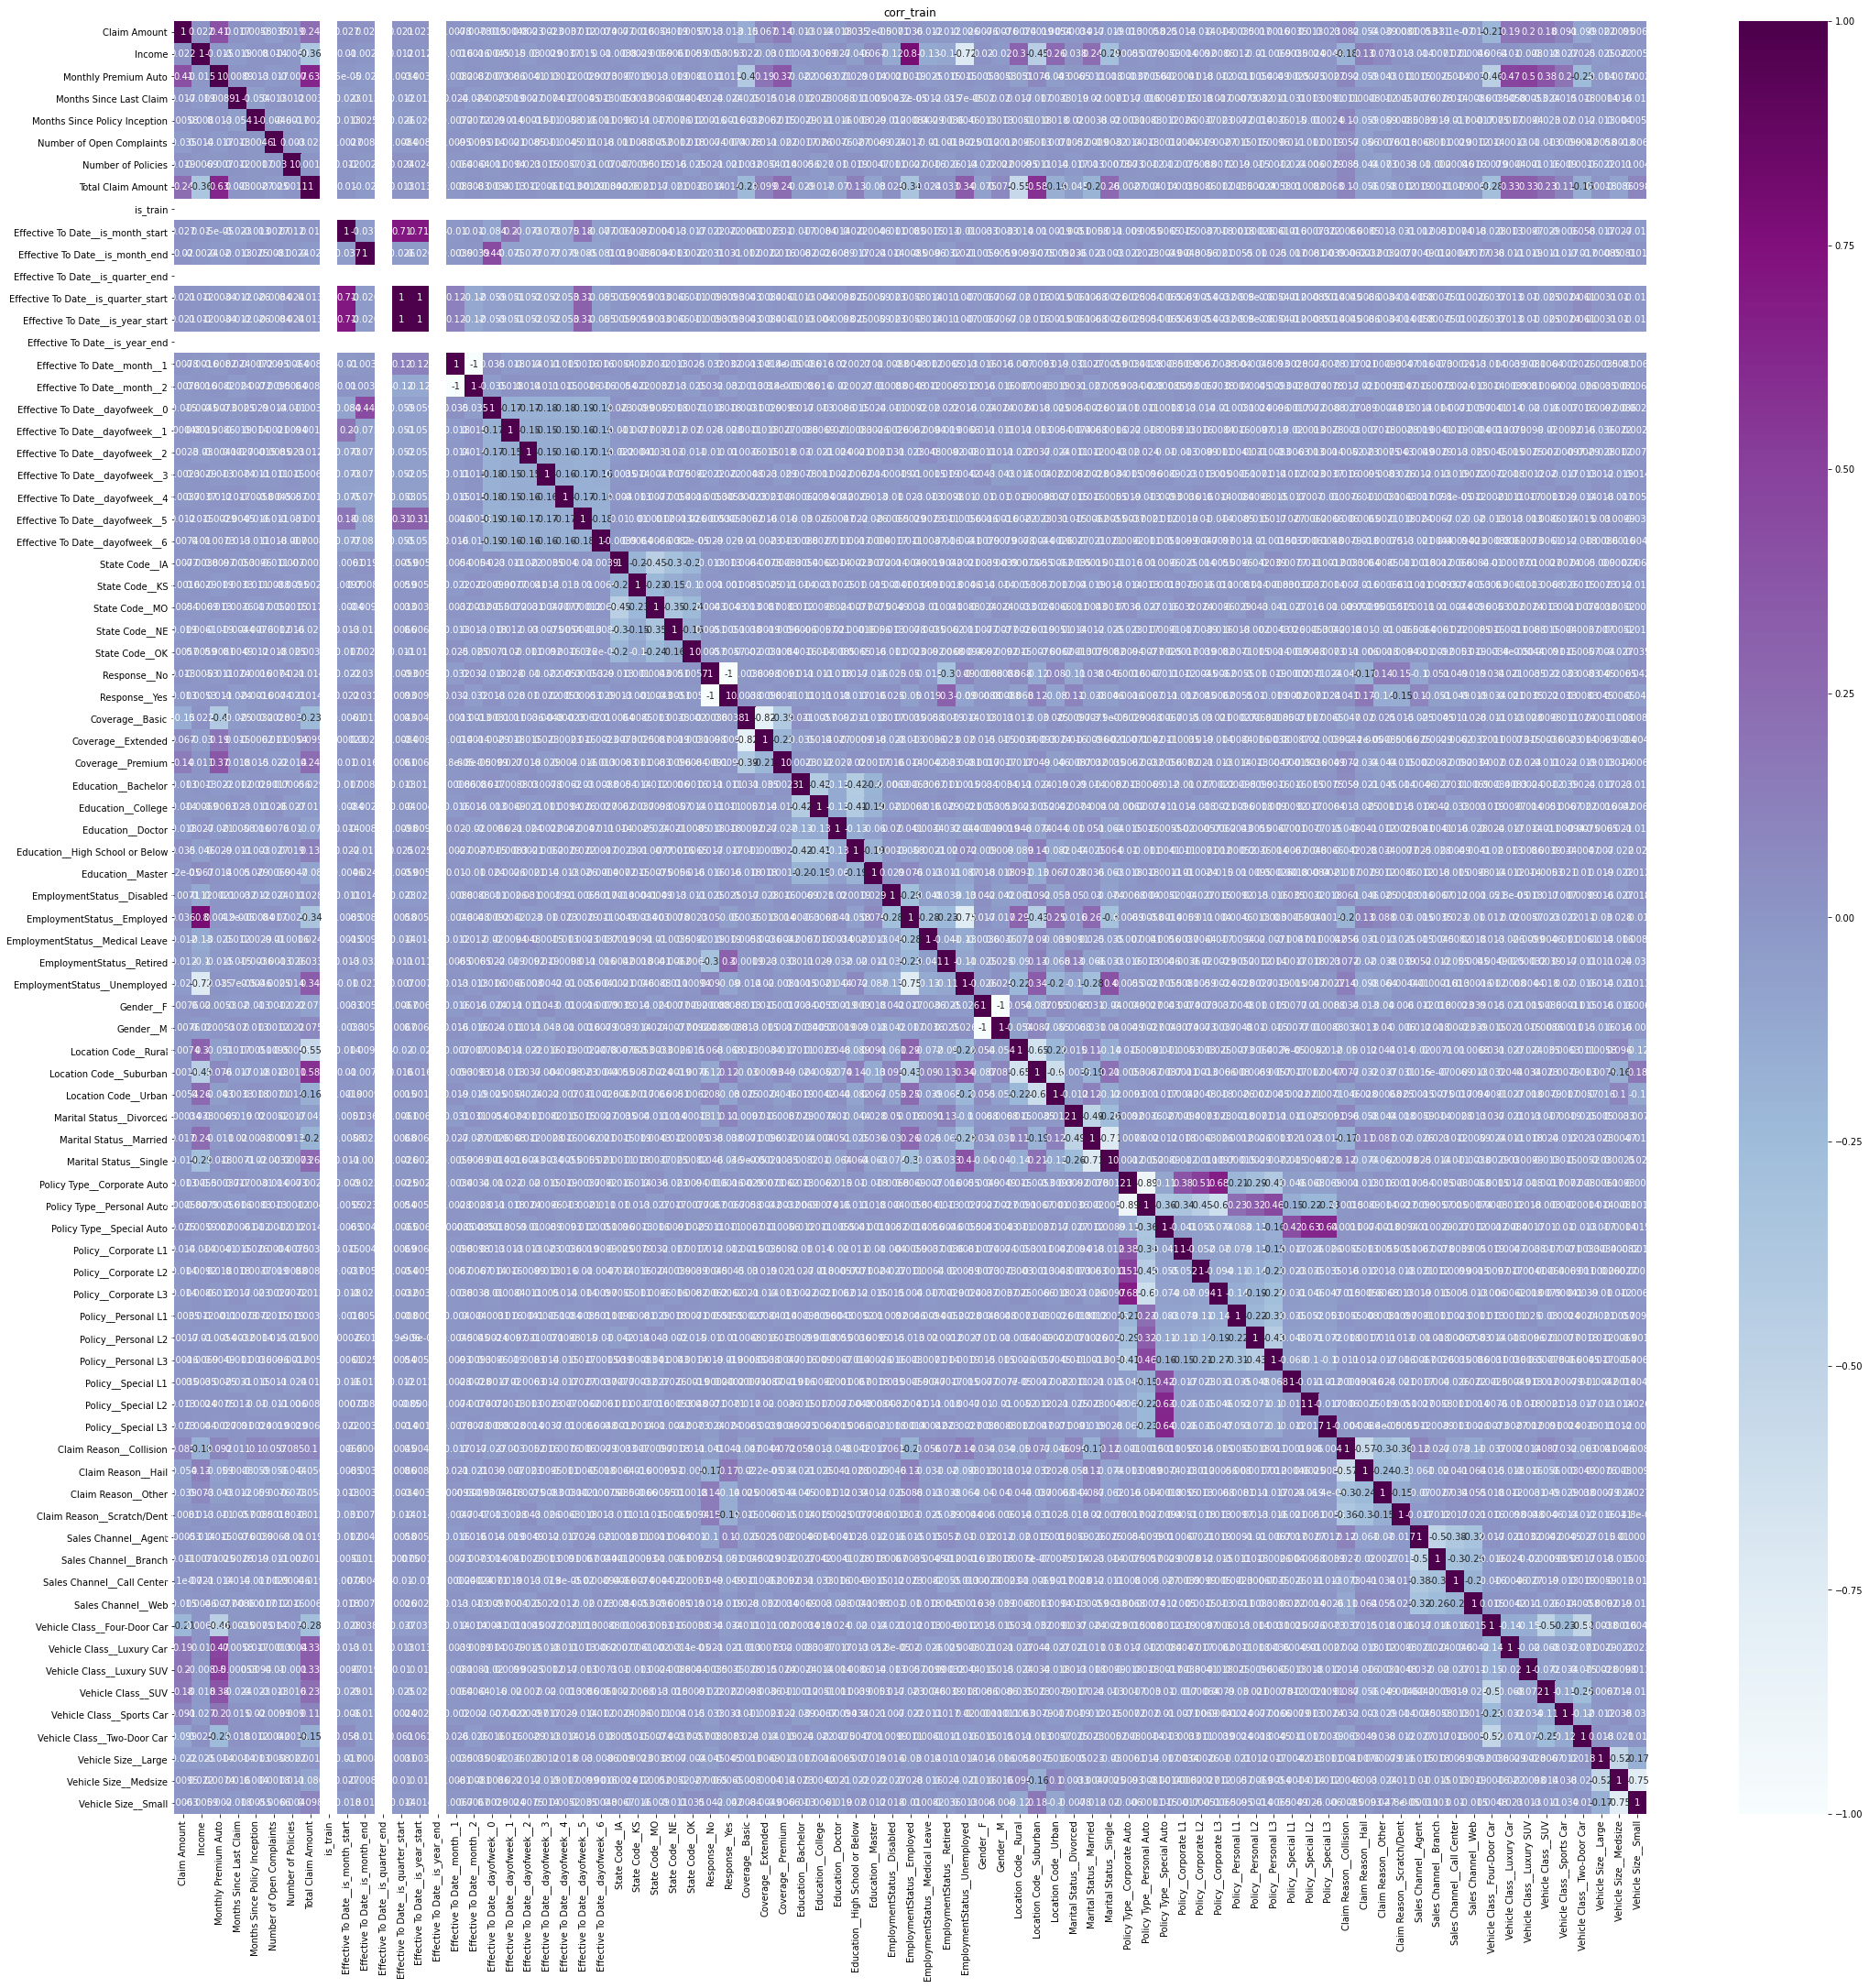

In [37]:

plt.figure(figsize = (36,36)); plt.title("corr_train")
sns.heatmap(corr_train, annot=True, vmin=-1, vmax=1, cmap="BuPu")
del corr_train; gc.collect()



##### 测试集相关矩阵

In [38]:

corr_test = df_test .corr()
display(corr_test)

Claim Amount  ...  Vehicle Size__Small
Claim Amount                       1.000000  ...             0.003476
Income                             0.033146  ...             0.004824
Monthly Premium Auto               0.342241  ...            -0.023166
Months Since Last Claim           -0.013376  ...             0.009717
Months Since Policy Inception      0.024677  ...             0.013136
...                                     ...  ...                  ...
Vehicle Class__Sports Car          0.111522  ...            -0.017422
Vehicle Class__Two-Door Car       -0.100449  ...             0.023199
Vehicle Size__Large               -0.024705  ...            -0.166698
Vehicle Size__Medsize              0.013352  ...            -0.757140
Vehicle Size__Small                0.003476  ...             1.000000

[80 rows x 80 columns]

0

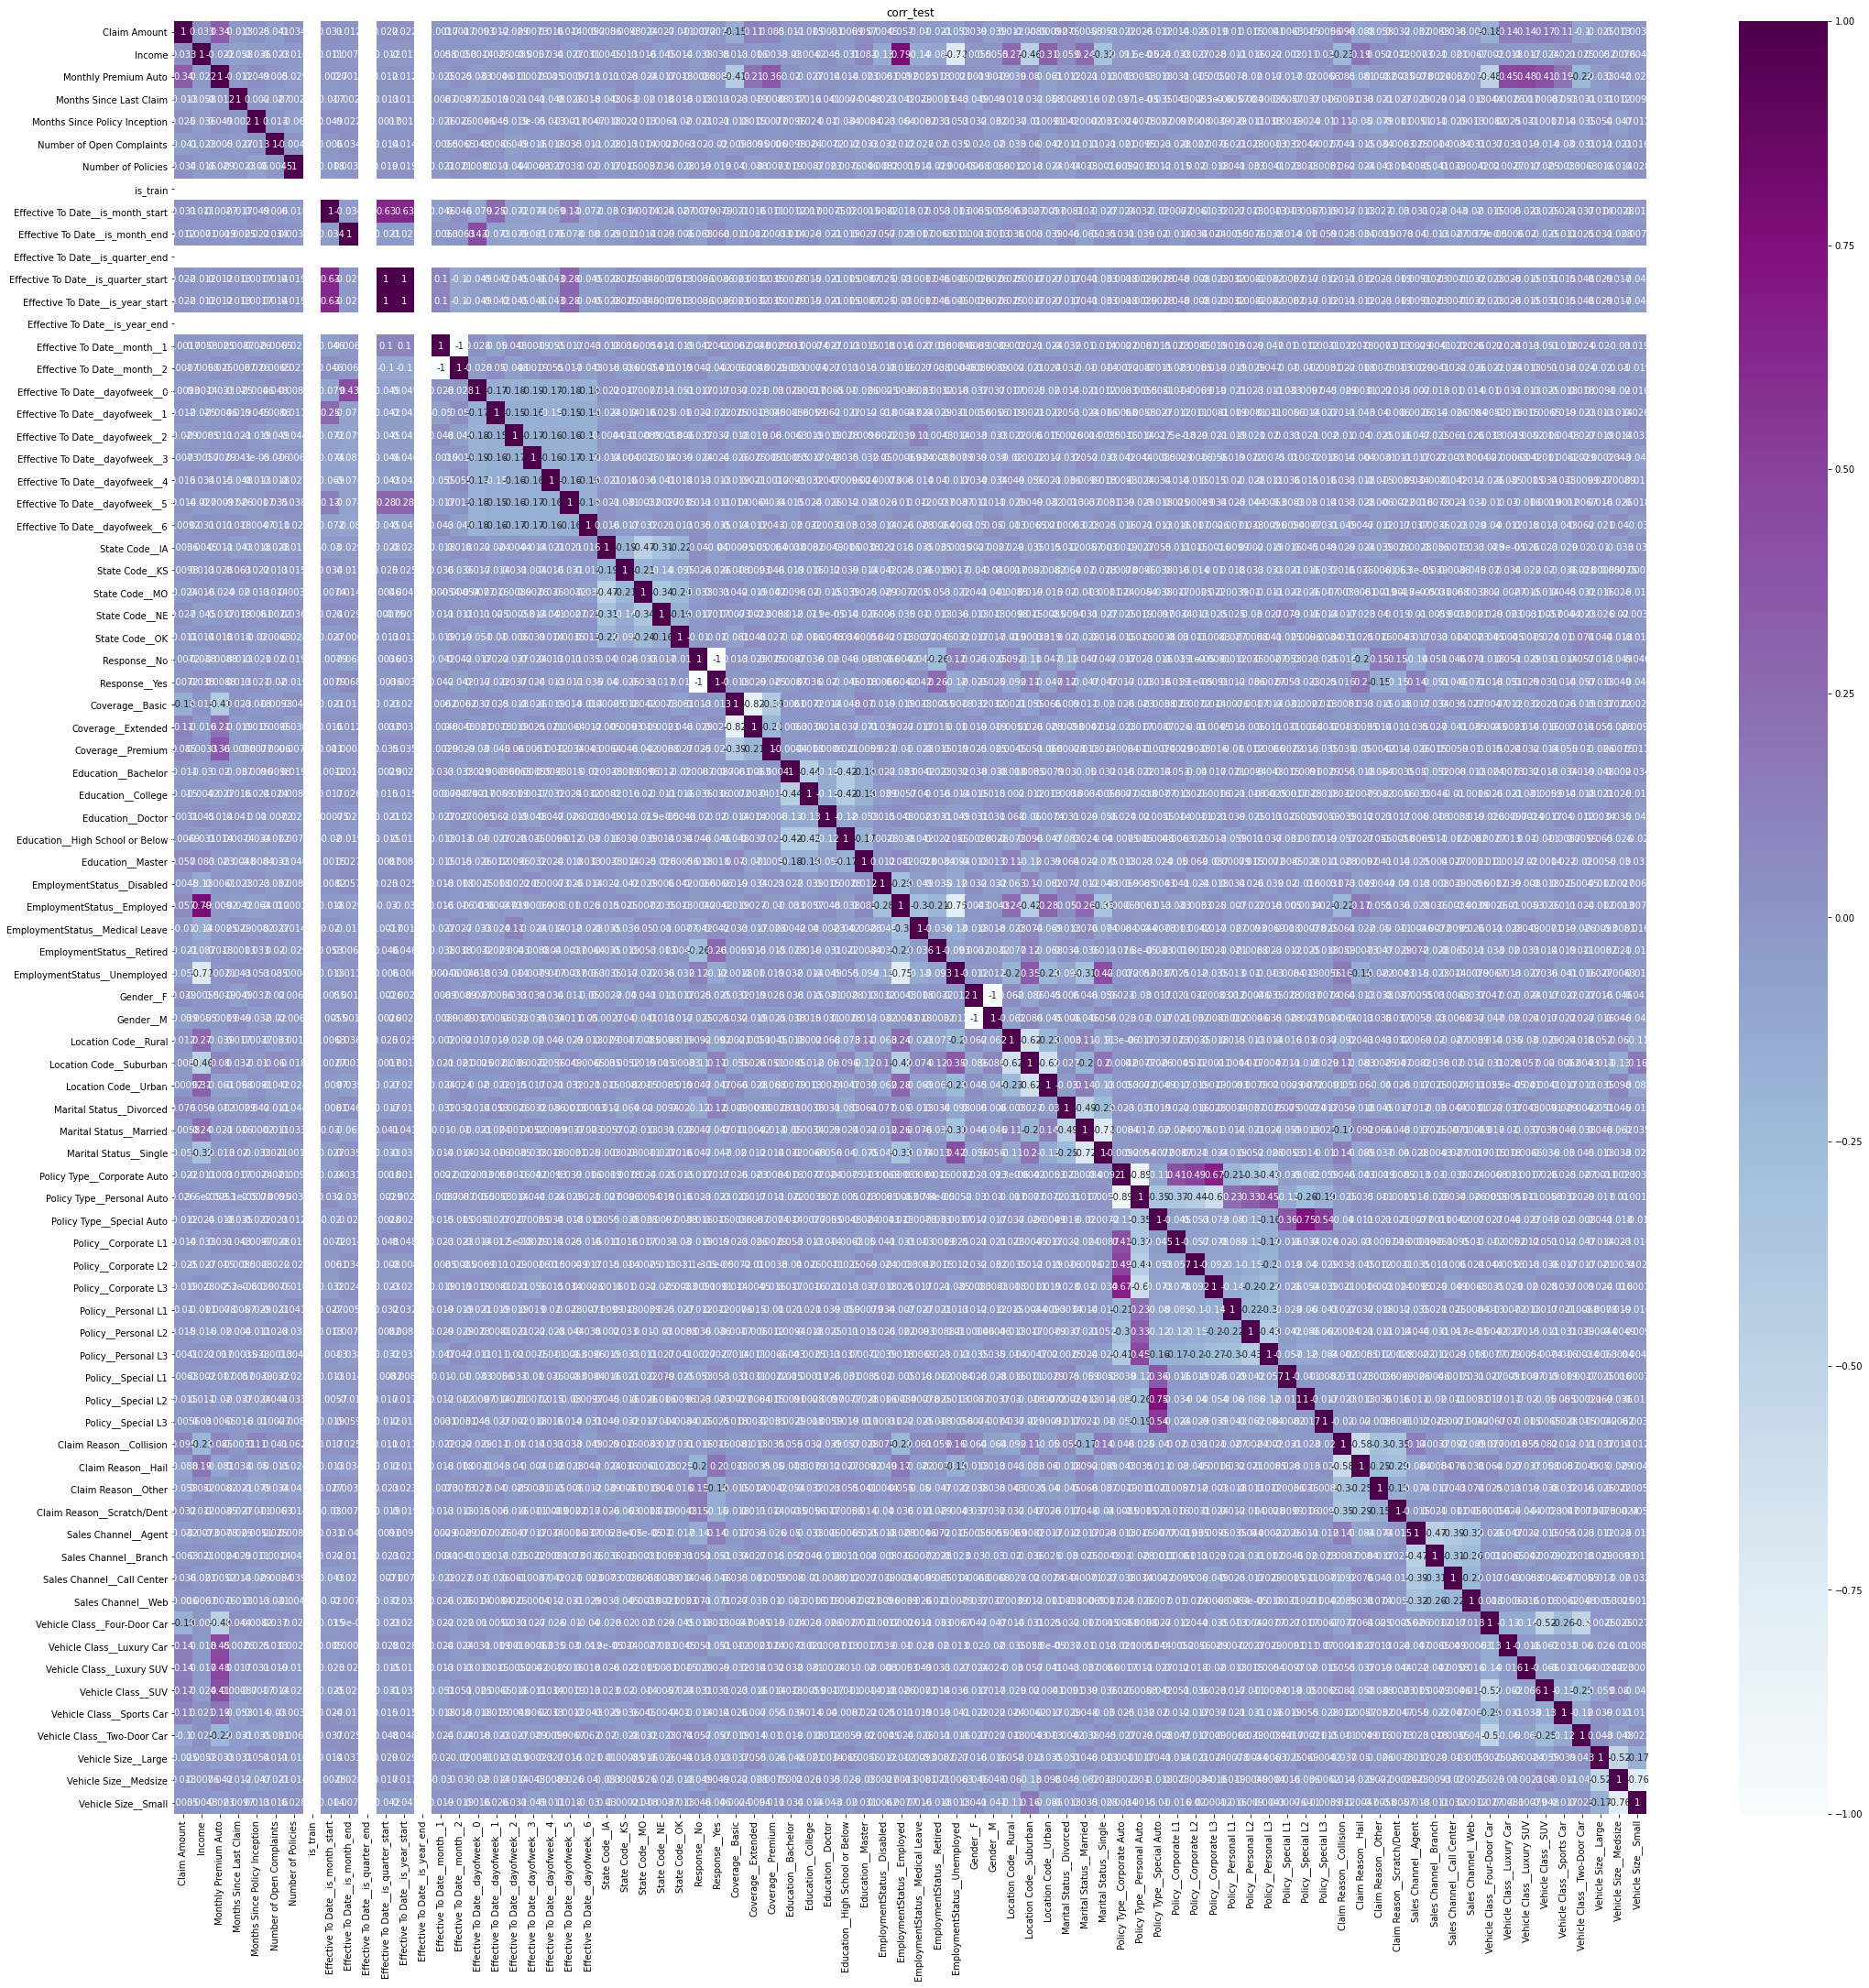

In [39]:

plt.figure(figsize = (36,36)); plt.title("corr_test")
sns.heatmap(corr_test, annot=True, vmin=-1, vmax=1, cmap="BuPu")
del corr_test; gc.collect()

